# Classifying pitch accent from spectrograms with XResNet

In [3]:
import fastaudio
from fastaudio.core.all import *
from fastai.vision.all import *
# import torchaudio.functional as audF
# import torchaudio.transforms as audT

In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
Path()

Path('.')

In [3]:
nhk = pd.read_csv('labels3.csv', delimiter=';')
nhk

,i,j,path,pattern,kana,morae,drop,type
0,0,0,ある.yomi000142BB_0596.mp3,頭高,アル,2,1,nhk
1,2,0,思う.yomi0006C617_043A.mp3,中高,オモウ,3,2,nhk
2,3,0,など.yomi000240B7_0028.mp3,頭高,ナド,2,1,nhk
3,4,0,私.yomi00092F63_0072.mp3,平板,ワタくシ,4,0,nhk
4,5,0,見る.yomi000A41BD_001E.mp3,頭高,ミル,2,1,nhk
...,...,...,...,...,...,...,...,...
80115,74183,0,捨てがな_捨て仮名.yomi00072538_06BE.mp3,平板,すテカ゚ナ,5,0,nhk
80116,74185,0,くも膜下出血_蜘蛛膜下出血.yomi0001AAD1_0622.mp3,中高,クモマッカしュッケツ,9,6,nhk
80117,74187,0,捜す.yomi00072507_0088.mp3,平板,サカ゚ス,4,0,nhk
80118,74188,0,捜し物.yomi000724FD_0424.mp3,平板,サカ゚シモノ,6,0,nhk


In [4]:
nhk = nhk.iloc[:,2:]
nhk

,path,pattern,kana,morae,drop,type
0,ある.yomi000142BB_0596.mp3,頭高,アル,2,1,nhk
1,思う.yomi0006C617_043A.mp3,中高,オモウ,3,2,nhk
2,など.yomi000240B7_0028.mp3,頭高,ナド,2,1,nhk
3,私.yomi00092F63_0072.mp3,平板,ワタくシ,4,0,nhk
4,見る.yomi000A41BD_001E.mp3,頭高,ミル,2,1,nhk
...,...,...,...,...,...,...
80115,捨てがな_捨て仮名.yomi00072538_06BE.mp3,平板,すテカ゚ナ,5,0,nhk
80116,くも膜下出血_蜘蛛膜下出血.yomi0001AAD1_0622.mp3,中高,クモマッカしュッケツ,9,6,nhk
80117,捜す.yomi00072507_0088.mp3,平板,サカ゚ス,4,0,nhk
80118,捜し物.yomi000724FD_0424.mp3,平板,サカ゚シモノ,6,0,nhk


In [190]:
nhk_path = Path("accentAudio")
nhk_path.ls()

(#80120) [Path('accentAudio/α粒子.yomi00013233_063E.mp3'),Path('accentAudio/α線.yomi0001323E_0162.mp3'),Path('accentAudio/γ.yomi00013247_04EE.mp3'),Path('accentAudio/γ線.yomi0001324B_0100.mp3'),Path('accentAudio/λ.yomi00013255_034C.mp3'),Path('accentAudio/π.yomi0001325F_0238.mp3'),Path('accentAudio/σ.yomi00013265_07D4.mp3'),Path('accentAudio/ω.yomi0001326D_05E0.mp3'),Path('accentAudio/○×式.yomi00013273_004A.mp3'),Path('accentAudio/ああ.yomi00013280_030E.mp3')...]

In [72]:
nhk.path = nhk_path / nhk.path

In [89]:
single_drops = [str(i) for i in range(0,30)]

In [91]:
nhk = nhk[(nhk['drop'].isin(single_drops))]

In [92]:
nhk.to_csv("labels_nhk_clean.csv", index=False)

In [91]:
nhk = pd.read_csv("labels_nhk_clean.csv")
nhk

,path,pattern,kana,morae,drop,type
0,accentAudio/ある.yomi000142BB_0596.mp3,頭高,アル,2,1,nhk
1,accentAudio/思う.yomi0006C617_043A.mp3,中高,オモウ,3,2,nhk
2,accentAudio/など.yomi000240B7_0028.mp3,頭高,ナド,2,1,nhk
3,accentAudio/私.yomi00092F63_0072.mp3,平板,ワタくシ,4,0,nhk
4,accentAudio/見る.yomi000A41BD_001E.mp3,頭高,ミル,2,1,nhk
...,...,...,...,...,...,...
79480,accentAudio/捨てがな_捨て仮名.yomi00072538_06BE.mp3,平板,すテカ゚ナ,5,0,nhk
79481,accentAudio/くも膜下出血_蜘蛛膜下出血.yomi0001AAD1_0622.mp3,中高,クモマッカしュッケツ,9,6,nhk
79482,accentAudio/捜す.yomi00072507_0088.mp3,平板,サカ゚ス,4,0,nhk
79483,accentAudio/捜し物.yomi000724FD_0424.mp3,平板,サカ゚シモノ,6,0,nhk


In [97]:
ojad = pd.read_csv('ojad_labels_clean.csv')
ojad

,path,pattern,kana,morae,drop,type
0,ある-66_1_1_male.mp3,頭高,ある,2,1,ojad male
1,ある-66_1_1_female.mp3,頭高,ある,2,1,ojad female
2,あります-66_2_1_male.mp3,中高,あります,4,3,ojad male
3,あります-66_2_1_female.mp3,中高,あります,4,3,ojad female
4,あって-66_3_1_male.mp3,頭高,あって,3,1,ojad male
...,...,...,...,...,...,...
84477,立て-377_10_1_female.mp3,頭高,たて,2,1,ojad female
84478,立てる-377_11_1_male.mp3,中高,たてる,3,2,ojad male
84479,立てる-377_11_1_female.mp3,中高,たてる,3,2,ojad female
84480,立とう-377_12_1_male.mp3,中高,たとう,3,2,ojad male


In [98]:
ojad_folder = Path('OjadMedia')
ojad_folder.ls()

(#84356) [Path('OjadMedia/あくどい-2830_1_1_male.mp3'),Path('OjadMedia/あくどい-2830_2_1_female.mp3'),Path('OjadMedia/あくどい-2830_2_1_male.mp3'),Path('OjadMedia/あくどいです-2830_3_1_female.mp3'),Path('OjadMedia/あくどいです-2830_3_1_male.mp3'),Path('OjadMedia/あくどかった-2830_6_1_female.mp3'),Path('OjadMedia/あくどかった-2830_6_1_male.mp3'),Path('OjadMedia/あくどかった-2830_6_2_female.mp3'),Path('OjadMedia/あくどかった-2830_6_2_male.mp3'),Path('OjadMedia/あくどく-2830_4_1_female.mp3')...]

In [99]:
ojad.path = (ojad_folder / ojad.path)

In [100]:
ojad[ojad.path.apply(lambda x:  x.exists())]

,path,pattern,kana,morae,drop,type
0,OjadMedia/ある-66_1_1_male.mp3,頭高,ある,2,1,ojad male
1,OjadMedia/ある-66_1_1_female.mp3,頭高,ある,2,1,ojad female
2,OjadMedia/あります-66_2_1_male.mp3,中高,あります,4,3,ojad male
3,OjadMedia/あります-66_2_1_female.mp3,中高,あります,4,3,ojad female
4,OjadMedia/あって-66_3_1_male.mp3,頭高,あって,3,1,ojad male
...,...,...,...,...,...,...
84477,OjadMedia/立て-377_10_1_female.mp3,頭高,たて,2,1,ojad female
84478,OjadMedia/立てる-377_11_1_male.mp3,中高,たてる,3,2,ojad male
84479,OjadMedia/立てる-377_11_1_female.mp3,中高,たてる,3,2,ojad female
84480,OjadMedia/立とう-377_12_1_male.mp3,中高,たとう,3,2,ojad male


In [101]:
ojad.drop(ojad[ojad.duplicated()].index)

,path,pattern,kana,morae,drop,type
0,OjadMedia/ある-66_1_1_male.mp3,頭高,ある,2,1,ojad male
1,OjadMedia/ある-66_1_1_female.mp3,頭高,ある,2,1,ojad female
2,OjadMedia/あります-66_2_1_male.mp3,中高,あります,4,3,ojad male
3,OjadMedia/あります-66_2_1_female.mp3,中高,あります,4,3,ojad female
4,OjadMedia/あって-66_3_1_male.mp3,頭高,あって,3,1,ojad male
...,...,...,...,...,...,...
84477,OjadMedia/立て-377_10_1_female.mp3,頭高,たて,2,1,ojad female
84478,OjadMedia/立てる-377_11_1_male.mp3,中高,たてる,3,2,ojad male
84479,OjadMedia/立てる-377_11_1_female.mp3,中高,たてる,3,2,ojad female
84480,OjadMedia/立とう-377_12_1_male.mp3,中高,たとう,3,2,ojad male


In [102]:
ojad.to_csv('ojad_no_dup.csv', index=False)

In [103]:
ojad = pd.read_csv('ojad_no_dup.csv')
ojad

,path,pattern,kana,morae,drop,type
0,OjadMedia/ある-66_1_1_male.mp3,頭高,ある,2,1,ojad male
1,OjadMedia/ある-66_1_1_female.mp3,頭高,ある,2,1,ojad female
2,OjadMedia/あります-66_2_1_male.mp3,中高,あります,4,3,ojad male
3,OjadMedia/あります-66_2_1_female.mp3,中高,あります,4,3,ojad female
4,OjadMedia/あって-66_3_1_male.mp3,頭高,あって,3,1,ojad male
...,...,...,...,...,...,...
84477,OjadMedia/立て-377_10_1_female.mp3,頭高,たて,2,1,ojad female
84478,OjadMedia/立てる-377_11_1_male.mp3,中高,たてる,3,2,ojad male
84479,OjadMedia/立てる-377_11_1_female.mp3,中高,たてる,3,2,ojad female
84480,OjadMedia/立とう-377_12_1_male.mp3,中高,たとう,3,2,ojad male


In [104]:
all_labeles = pd.concat([nhk, ojad]).reset_index(drop=True)

In [48]:
all_labeles.to_csv('all_labeles.csv', index=False)

In [5]:
cnfg = AudioConfig.Voice()

In [6]:
at = AudioTensor.create('accentAudio/捨てがな_捨て仮名.yomi00072538_06BE.mp3')

In [7]:
aud2spec = AudioToSpec.from_cfg(cnfg)

<AxesSubplot:>

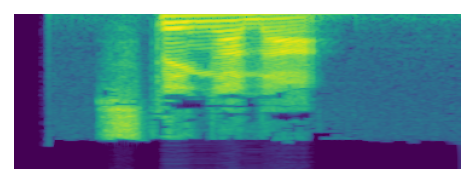

In [8]:
show_image(aud2spec(at))

<AxesSubplot:>

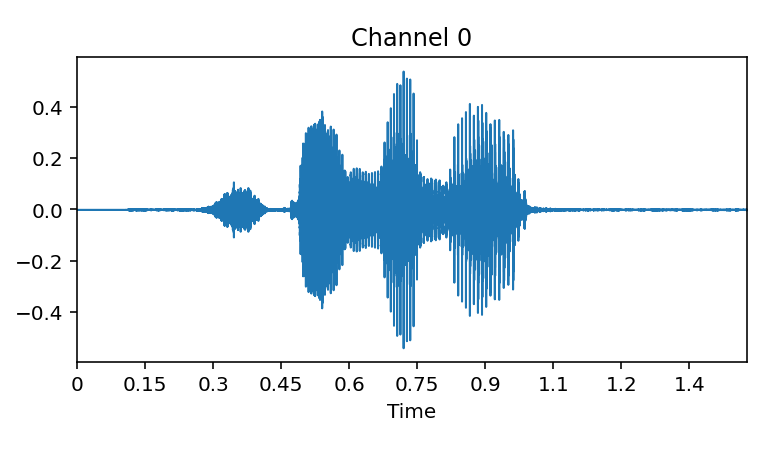

In [9]:
at.show()

In [10]:
crop2s = ResizeSignal(2000)

In [11]:
# learn.model[0][0].in_channels
def alter_learner(learn):
    layer = learn.model[0][0]
    layer.in_channels = 1
    layer.weight = nn.Parameter(layer.weight[:,1,:,:].unsqueeze(1))
    learn.model[0][0] = layer

## Balanced Dataset

In [135]:
all_labeles["is_valid"] = False

In [150]:
all_labeles.loc[all_labeles.type=='ojad male', 'is_valid'] = True

In [156]:
all_labeles.pattern.unique()

array(['頭高', '中高', '平板', '尾高', 'None'], dtype=object)

In [165]:
all_labeles = all_labeles[all_labeles.pattern.isin(['頭高', '中高', '平板'])]

In [166]:
all_labeles.to_csv('ready_for_training.csv')

In [12]:
all_labeles = pd.read_csv('ready_for_training.csv').iloc[:,1:]
all_labeles

,path,pattern,kana,morae,drop,type,is_valid
0,accentAudio/ある.yomi000142BB_0596.mp3,頭高,アル,2,1,nhk,False
1,accentAudio/思う.yomi0006C617_043A.mp3,中高,オモウ,3,2,nhk,False
2,accentAudio/など.yomi000240B7_0028.mp3,頭高,ナド,2,1,nhk,False
3,accentAudio/私.yomi00092F63_0072.mp3,平板,ワタくシ,4,0,nhk,False
4,accentAudio/見る.yomi000A41BD_001E.mp3,頭高,ミル,2,1,nhk,False
...,...,...,...,...,...,...,...
160758,OjadMedia/立て-377_10_1_female.mp3,頭高,たて,2,1,ojad female,False
160759,OjadMedia/立てる-377_11_1_male.mp3,中高,たてる,3,2,ojad male,True
160760,OjadMedia/立てる-377_11_1_female.mp3,中高,たてる,3,2,ojad female,False
160761,OjadMedia/立とう-377_12_1_male.mp3,中高,たとう,3,2,ojad male,True


In [38]:
def get_x(df):
    return df.path
def get_y(df):
    return df.pattern

In [39]:
dblock = DataBlock(blocks=[AudioBlock, CategoryBlock],
                  get_x=get_x,
                   item_tfms=[crop2s, aud2spec],
                   get_y=get_y,
                   splitter=ColSplitter()
                  )

In [40]:
dls2 = dblock.dataloaders(all_labeles)

In [41]:
learn2 = Learner(dls2, xresnet50(pretrained=True, n_out=3), CrossEntropyLossFlat(),
                 metrics=[accuracy, F1Score(average='weighted')], wd=0.1).to_fp16()

In [42]:
alter_learner(learn2)

In [43]:
learn2.unfreeze()

In [37]:
learn2.lr_find()

NameError: name 'learn2' is not defined

In [44]:
learn2.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.066778,0.967686,0.734908,0.733175,09:10
1,0.031727,0.363357,0.887411,0.889306,09:11
2,0.018233,0.082557,0.975262,0.975678,09:17
3,0.009462,0.058793,0.983618,0.983467,09:09


In [45]:
learn2.predict??

Signature: learn2.predict(item, rm_type_tfms=None, with_input=False)
Docstring: Prediction on `item`, fully decoded, loss function decoded and probabilities
Source:   
    def predict(self, item, rm_type_tfms=None, with_input=False):
        dl = self.dls.test_dl([item], rm_type_tfms=rm_type_tfms, num_workers=0)
        inp,preds,_,dec_preds = self.get_preds(dl=dl, with_input=True, with_decoded=True)
        i = getattr(self.dls, 'n_inp', -1)
        inp = (inp,) if i==1 else tuplify(inp)
        dec = self.dls.decode_batch(inp + tuplify(dec_preds))[0]
        dec_inp,dec_targ = map(detuplify, [dec[:i],dec[i:]])
        res = dec_targ,dec_preds[0],preds[0]
        if with_input: res = (dec_inp,) + res
        return res
File:      ~/.conda/envs/default/lib/python3.9/site-packages/fastai/learner.py
Type:      method


In [47]:
learn2.dls.test_dl(['accentAudio/捨てがな_捨て仮名.yomi00072538_06BE.mp3'])

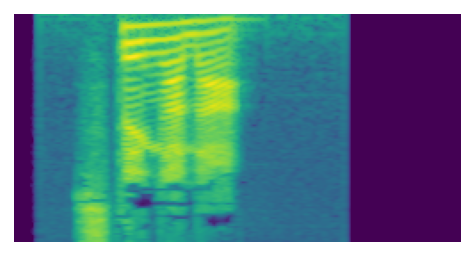

In [63]:
im = show_image(learn2.predict('accentAudio/捨てがな_捨て仮名.yomi00072538_06BE.mp3', with_input=True)[0])

In [72]:
spec = learn2.predict('accentAudio/捨てがな_捨て仮名.yomi00072538_06BE.mp3', with_input=True)[0]

In [87]:
spec.show??

Signature: spec.show(ctx=None, ax=None, title='', **kwargs)
Source:   
    def show(self, ctx=None, ax=None, title="", **kwargs):
        "Show spectrogram using librosa"
        return show_spectrogram(self, ctx=ctx, ax=ax, title=title, **kwargs)
File:      ~/.conda/envs/default/lib/python3.9/site-packages/fastaudio/core/spectrogram.py
Type:      method


In [88]:
??show_spectrogram

Signature: show_spectrogram(sg, title='', ax=None, ctx=None, **kwargs)
Docstring: <no docstring>
Source:   
def show_spectrogram(sg, title="", ax=None, ctx=None, **kwargs):
    ax = ifnone(ax, ctx)
    if ax is None:
        _, ax = plt.subplots()
    ax.axis(False)
    for i, channel in enumerate(sg):
        # x_start, y_start, x_lenght, y_lenght, all in percent
        ia = ax.inset_axes((i / sg.nchannels, 0.2, 1 / sg.nchannels, 0.7))
        z = specshow(
            channel.cpu().numpy(), ax=ia, **sg._all_show_args(show_y=i == 0), **kwargs
        )
        ia.set_title(f"Channel {i}")
        if i == 0:  # Only colorbar the first one
            plt.colorbar(z, format=sg._colorbar_fmt, ax=ax)
    ax.set_title(title)

    return ax
File:      ~/.conda/envs/default/lib/python3.9/site-packages/fastaudio/core/spectrogram.py
Type:      function


In [96]:
def my_show_spectrogram(sg, title="", ax=None, ctx=None, **kwargs):
    ax = ifnone(ax, ctx)
    if ax is None:
        fig, ax = plt.subplots()
    ax.axis(False)
    for i, channel in enumerate(sg):
        # x_start, y_start, x_lenght, y_lenght, all in percent
        ia = ax.inset_axes((i / sg.nchannels, 0.2, 1 / sg.nchannels, 0.7))
        z = specshow(
            channel.cpu().numpy(), ax=ia, **sg._all_show_args(show_y=i == 0), **kwargs
        )
        ia.set_title(f"Channel {i}")
        if i == 0:  # Only colorbar the first one
            plt.colorbar(z, format=sg._colorbar_fmt, ax=ax)
    ax.set_title(title)
    return fig

In [98]:
show_image??

Signature:
show_image(
    im,
    ax=None,
    figsize=None,
    title=None,
    ctx=None,
    cmap=None,
    norm=None,
    *,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    interpolation_stage=None,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Source:   
@delegates(plt.Axes.imshow, keep=True, but=['shape', 'imlim'])
def show_image(im, ax=None, figsize=None, title=None, ctx=None, **kwargs):
    "Show a PIL or PyTorch image on `ax`."
    # Handle pytorch axis order
    if hasattrs(im, ('data','cpu','permute')):
        im = im.data.cpu()
        if im.shape[0]<5: im=im.permute(1,2,0)
    elif not isinstance(im,np.ndarray): im=array(im)
    # Handle 1-channel images
    if im.shape[-1]==1: im=im[...,0]

    ax = ifnone(ax,ctx)
    if figsize is None: figsize = (_fig_bounds(im.shape[0]), _fig_bounds(im.shape[1]))
    if ax is None: _,ax = plt.subplots(

In [99]:
@delegates(plt.Axes.imshow, keep=True, but=['shape', 'imlim'])
def my_show_image(im, ax=None, figsize=None, title=None, ctx=None, **kwargs):
    "Show a PIL or PyTorch image on `ax`."
    # Handle pytorch axis order
    if hasattrs(im, ('data','cpu','permute')):
        im = im.data.cpu()
        if im.shape[0]<5: im=im.permute(1,2,0)
    elif not isinstance(im,np.ndarray): im=array(im)
    # Handle 1-channel images
    if im.shape[-1]==1: im=im[...,0]

    ax = ifnone(ax,ctx)
    if figsize is None: figsize = (_fig_bounds(im.shape[0]), _fig_bounds(im.shape[1]))
    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: ax.set_title(title)
    ax.axis('off')
    return fig

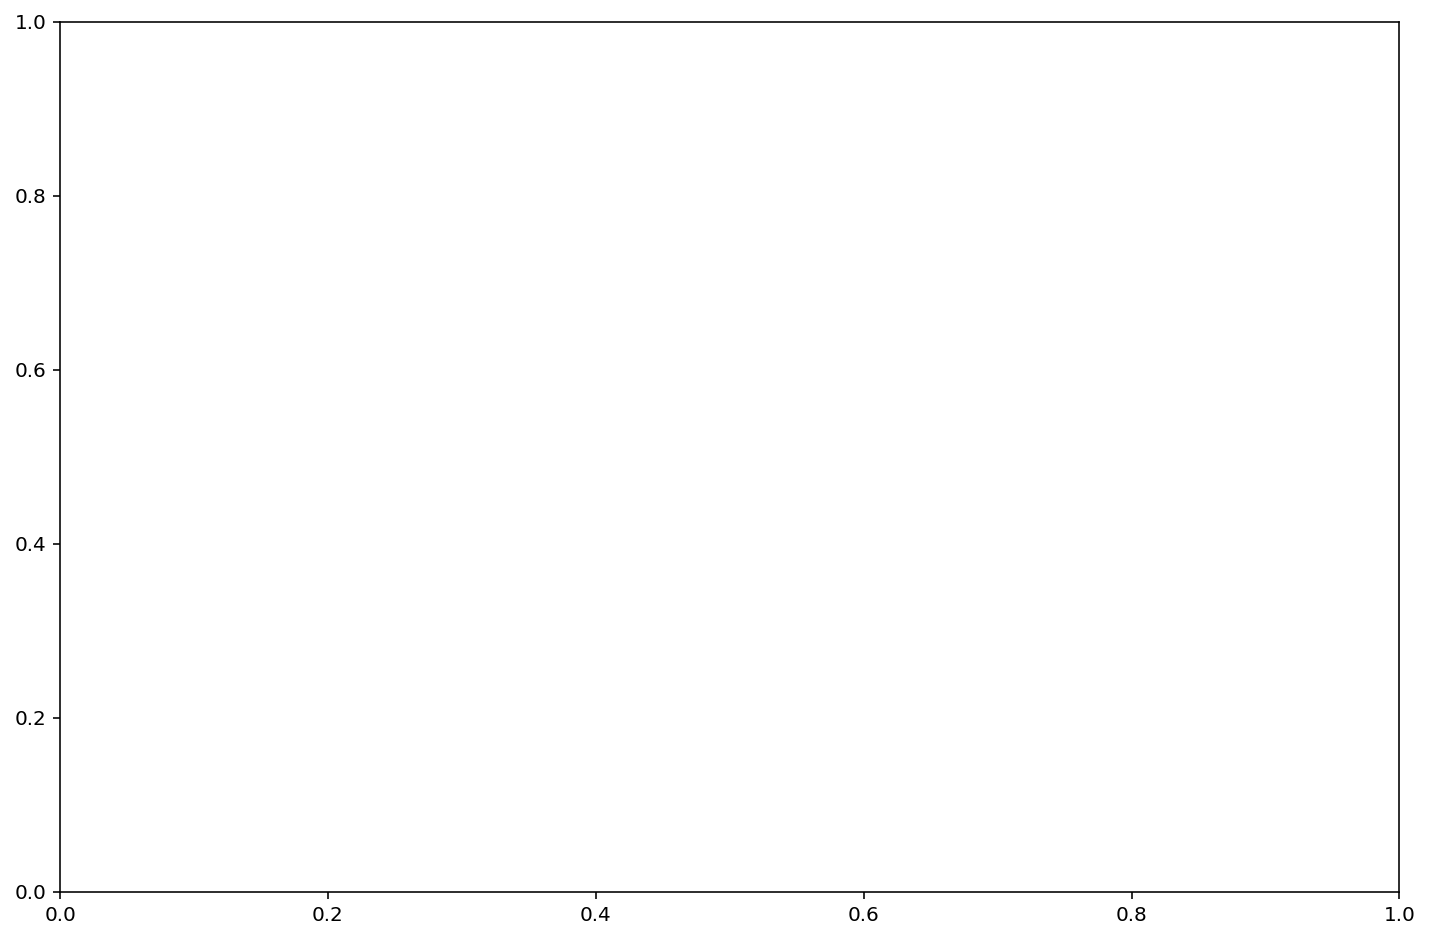

In [118]:
fig,ax = plt.subplots(figsize=(12,8))

In [119]:
show_image(spec, ax=ax)

<AxesSubplot:>

In [126]:
ax.invert_yaxis()

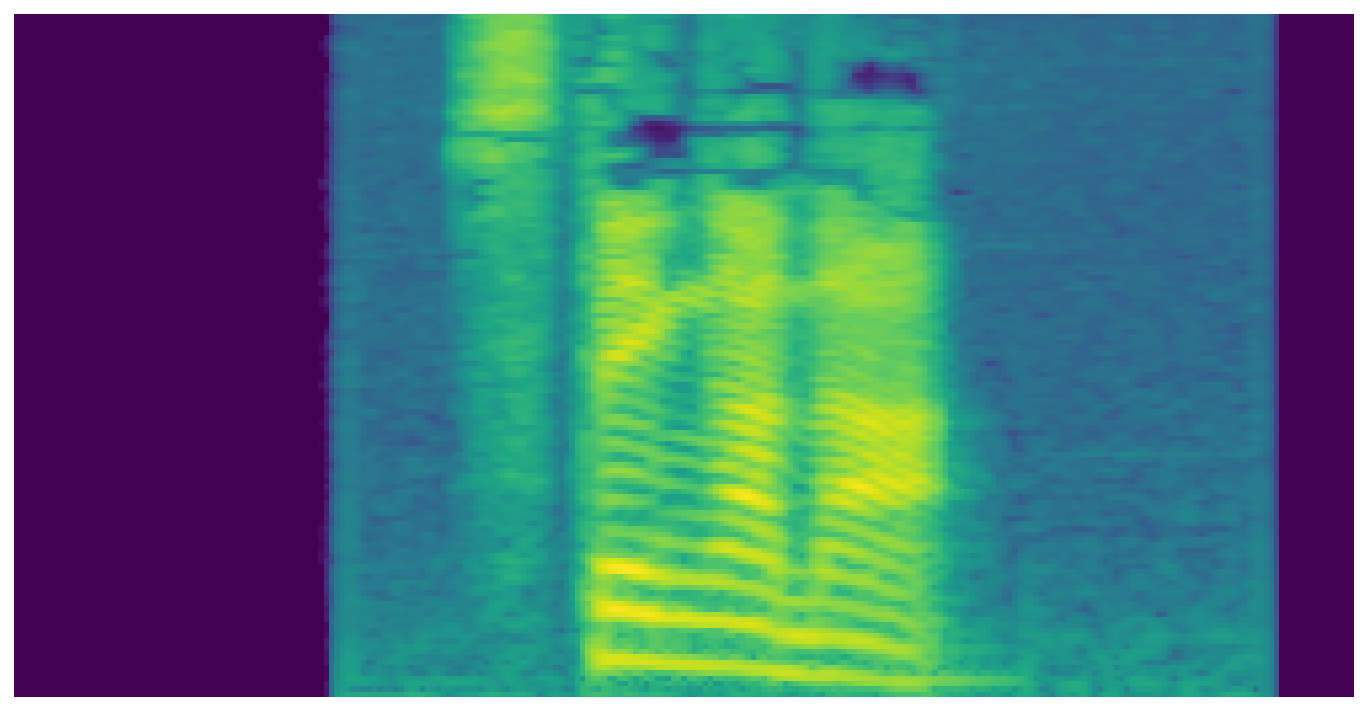

In [127]:
fig

In [103]:
type(fig)

matplotlib.figure.Figure

In [104]:
fig.savefig()

TypeError: savefig() missing 1 required positional argument: 'fname'

In [ ]:
learn2.export('xresnet50_pitch4.pkl')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=6.918309736647643e-06)

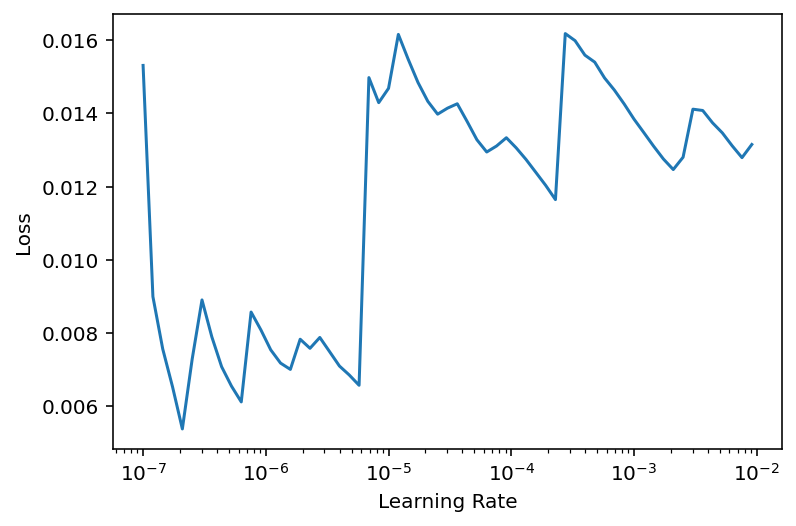

In [43]:
learn2.lr_find()

In [45]:
learn2.fit_one_cycle(1, slice(1e-7, 1e-4))

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.013067,0.055579,0.984612,0.984549,08:57


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fb5a03c7f70>
Traceback (most recent call last):
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fb5a03c7f70>
Traceback (most recent call last):
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/home/studio-lab-

In [35]:
interp = ClassificationInterpretation.from_learner(learn2)

KeyboardInterrupt: 

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/fastai/interpret.py:88: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/fastai/interpret.py:88: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.tight_layout()
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/fastai/interpret.py:88: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  plt.tight_layout()
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/fastai/interpret.py:88: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from current font.
  plt.tight_layout()
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/fastai/interpret.py:88: UserWarning: Glyph 38957 (\N{CJK UNIFIED IDEOGRAPH-982D}) missing from current font.
  plt.tight_layout()


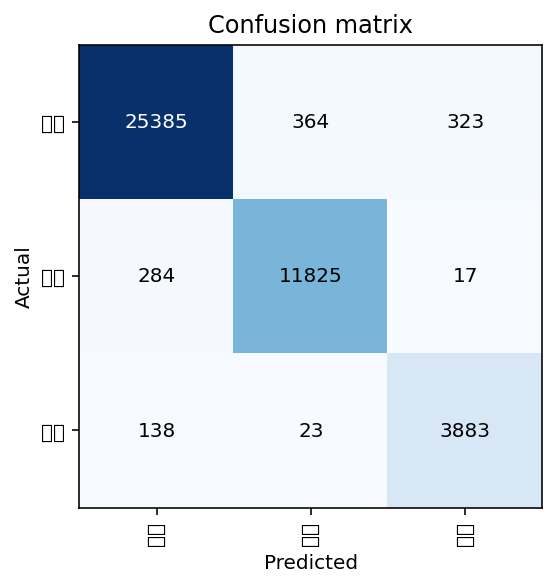

In [33]:
interp.plot_confusion_matrix()

In [37]:
interp.top_losses(10)

torch.return_types.topk(
values=TensorBase([12.8439, 11.7735, 10.9846, 10.9390, 10.9109, 10.3787, 10.1313, 10.0061,
         9.9258,  9.9219]),
indices=TensorBase([34307, 34303, 34301, 34304, 34308, 34299, 15817, 35954, 35959, 35960]))

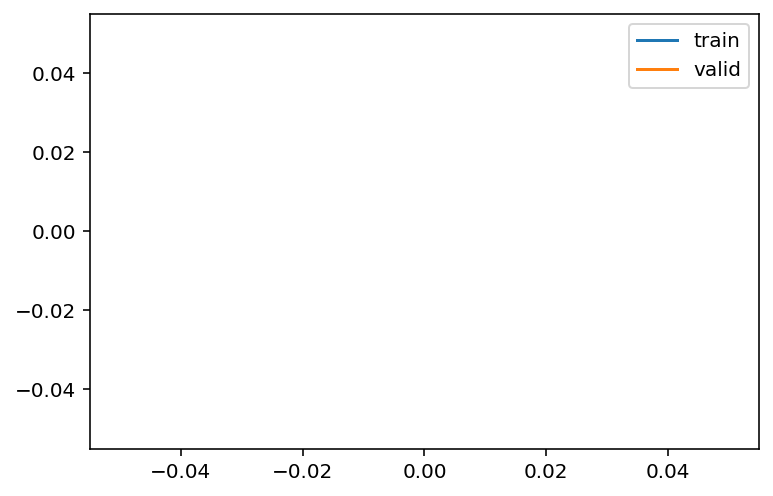

In [35]:
learn2.recorder.plot_loss()

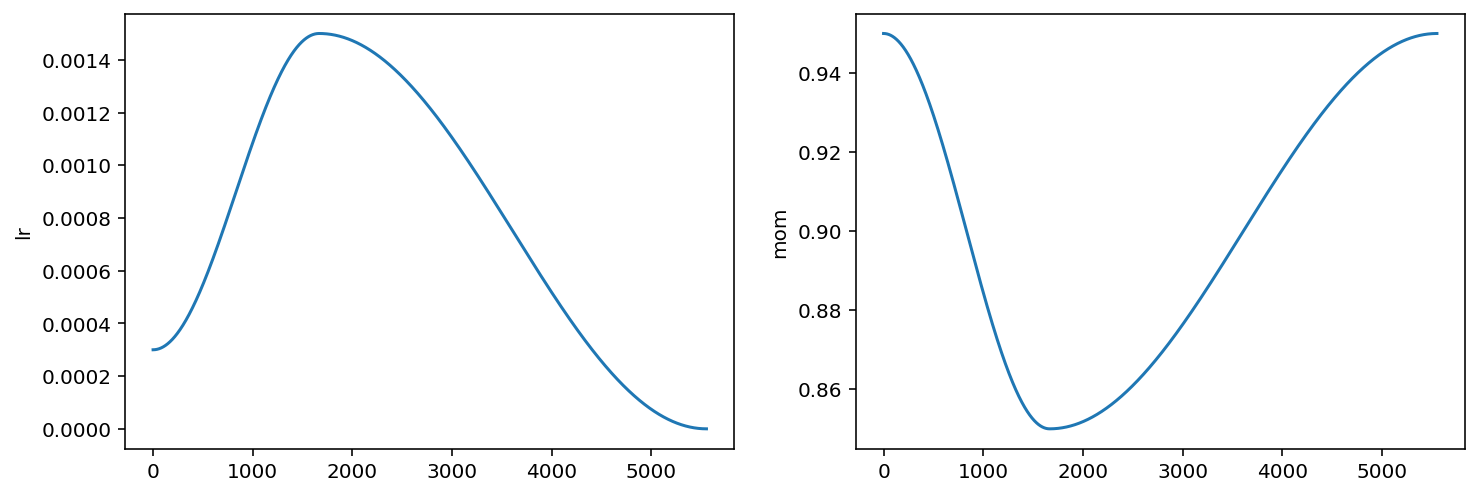

In [179]:
learn2.recorder.plot_sched()

SuggestedLRs(lr_min=4.231245547998696e-05, lr_steep=3.108016528585722e-07)

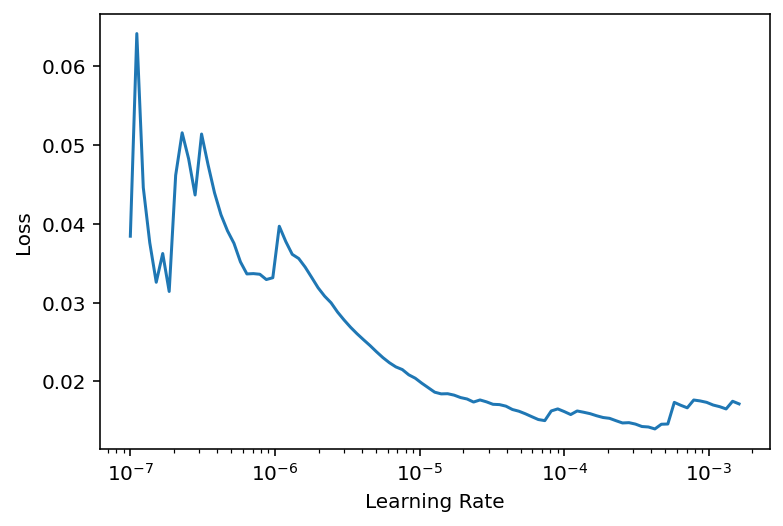

In [40]:
learn2.lr_find(end_lr=3e-3)

In [43]:
learn2.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.023997,0.083359,0.972705,0.972784,09:37


In [183]:
learn2.unfreeze()

SuggestedLRs(lr_min=1.0964782268274575e-05, lr_steep=7.585775847473997e-07)

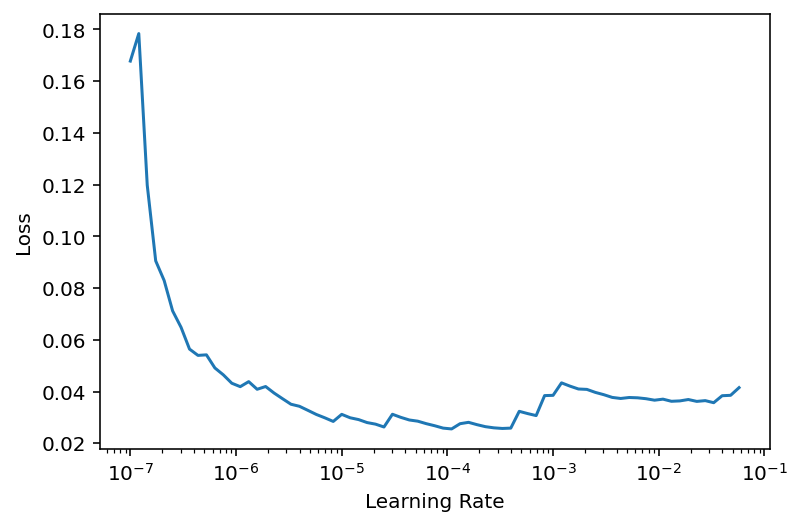

In [184]:
learn2.lr_find()

In [185]:
learn2.fit_one_cycle(1,1e-4)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.017284,0.098019,0.967260,0.967444,09:45


In [27]:
learn3 = load_learner('xresnet50_pitch4.pkl', cpu=False)

In [28]:
learn3.predict(str(Path('accentAudio').ls()[11]))

('頭高', tensor(2), tensor([0.0031, 0.0037, 0.9932]))

In [29]:
test_dl = learn3.dls.test_dl(all_labeles[all_labeles.is_valid], with_labels=True, device='cuda')


In [32]:
learn3.validate(dl=test_dl)

(#3) [0.060875341296195984,0.9831920862197876,0.983100919452563]

In [33]:
learn4 = load_learner('xresnet50_pitch3.pkl', cpu=False)

In [34]:
learn4.predict(str(Path('accentAudio').ls()[11]))

('頭高', tensor(2), tensor([0.0029, 0.0041, 0.9930]))

In [35]:
test_dl2 = learn4.dls.test_dl(all_labeles[all_labeles.is_valid], with_labels=True, device='cuda')


In [36]:
learn4.validate(dl=test_dl2)

(#3) [0.05385279282927513,0.9848018288612366,0.9847705780164172]

In [ ]:
""

In [22]:
learn3 = learn3.to_fp16()

In [225]:
learn3.loss_func

FlattenedLoss of CrossEntropyLoss()

In [64]:
test_df = all_labeles[all_labeles.is_valid].iloc[:500]

In [65]:
test_dl = learn3.dls.test_dl(test_df, with_labels=True)

In [66]:
learn3.validate(dl=test_dl)

(#3) [inf,0.20600000023841858,0.07037479270315092]

In [111]:
model2 = learn2.model

In [114]:
learn2.load('xresnet50_pitch')

In [115]:
learn2.validate()

(#3) [nan,0.6172056198120117,0.4711123649048932]

In [53]:
preds = learn3.get_preds()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [44]:
preds

(tensor([[0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.],
         ...,
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 0., 1.]]),
 TensorCategory([2, 0, 2,  ..., 2, 0, 0]))

In [41]:
accuracy(*preds)

TensorBase(0.0957)

In [33]:
learn3.predict('accentAudio/捨てがな_捨て仮名.yomi00072538_06BE.mp3')

('頭高', tensor(2), tensor([0., 0., 1.]))

In [29]:
dls2.one_batch()

(AudioSpectrogram([[[[-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           ...,
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000]]],
 
 
         [[[ -28.2893,  -28.7102,  -26.7082,  ...,  -19.0853,  -18.6828,
             -18.5270],
           [ -37.8061,  -30.6726,  -31.8275,  ...,  -26.4502,  -29.9839,
             -38.9229],
           [ -23.4762,  -23.4764,  -22.1053,  ...,  -22.9335,  -22.0958,
             -21.4823],
           ...,
           [ -48.4518,  -49.2042,  -51.2680,  ...,  -62.0887,  -60.4902,
      

In [ ]:
ojad

In [193]:
dataOjad = pd.read_csv(Path('ojad_labels3.csv'), delimiter=';')
dataOjad

,path,pattern,kana,morae,drop,type
0,ある-66_1_1_male.mp3,頭高,ある,2,1,ojad male
1,ある-66_1_1_female.mp3,頭高,ある,2,1,ojad female
2,あります-66_2_1_male.mp3,中高,あります,4,3,ojad male
3,あります-66_2_1_female.mp3,中高,あります,4,3,ojad female
4,あって-66_3_1_male.mp3,頭高,あって,3,1,ojad male
...,...,...,...,...,...,...
84485,立て-377_10_1_female.mp3,頭高,たて,2,1,ojad female
84486,立てる-377_11_1_male.mp3,中高,たてる,3,2,ojad male
84487,立てる-377_11_1_female.mp3,中高,たてる,3,2,ojad female
84488,立とう-377_12_1_male.mp3,中高,たとう,3,2,ojad male


In [205]:
import random
random.seed(42)
nakadaka = random.sample(dataOjad[(dataOjad.pattern == '中高') & (dataOjad.type=='ojad male')].path.values.tolist(), 300)
atamadaka = random.sample(dataOjad[(dataOjad.pattern == '頭高') & (dataOjad.type=='ojad male')].path.values.tolist(), 300)
heiban = random.sample(dataOjad[(dataOjad.pattern == '平板') & (dataOjad.type=='ojad male')].path.values.tolist(), 300)

ds2 = [(i, '中高') for i in nakadaka] + [(i, '頭高') for i in atamadaka] + [(i, '平板') for i in heiban]
df2 = pd.DataFrame(ds2, columns=['path', 'pattern'])
df2

,path,pattern
0,申し訳なく-3017_4_1_male.mp3,中高
1,別れられる-1405_11_1_male.mp3,中高
2,使用できる-2272_11_1_male.mp3,中高
3,涼もう-330_12_1_male.mp3,中高
4,伏せられる-1346_11_1_male.mp3,中高
...,...,...
895,欠席される-2078_9_1_male.mp3,平板
896,真似て-1564_3_1_male.mp3,平板
897,消極的に-3339_9_1_male.mp3,平板
898,実習した-2199_4_1_male.mp3,平板


In [206]:
path = Path('OjadMedia')

In [209]:
df2.path= path / df2.path

In [210]:
df2

,path,pattern
0,OjadMedia/申し訳なく-3017_4_1_male.mp3,中高
1,OjadMedia/別れられる-1405_11_1_male.mp3,中高
2,OjadMedia/使用できる-2272_11_1_male.mp3,中高
3,OjadMedia/涼もう-330_12_1_male.mp3,中高
4,OjadMedia/伏せられる-1346_11_1_male.mp3,中高
...,...,...
895,OjadMedia/欠席される-2078_9_1_male.mp3,平板
896,OjadMedia/真似て-1564_3_1_male.mp3,平板
897,OjadMedia/消極的に-3339_9_1_male.mp3,平板
898,OjadMedia/実習した-2199_4_1_male.mp3,平板


In [211]:
test_dl = dls2.test_dl(df2, with_labels=True)

In [212]:
test_dl.one_batch()

(AudioSpectrogram([[[[-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           ...,
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000]]],
 
 
         [[[-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           ...,
           [-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
      

In [215]:
preds = learn3.get_preds(dl=test_dl)

KeyboardInterrupt: 

In [214]:
learn3.validate(dl=test_dl)

(#3) [inf,0.3333333432674408,0.16666666666666666]

In [115]:
random.seed(42)
nakadaka = random.sample(dataOjad[(dataOjad.pattern == '中高') & (dataOjad.type=='ojad female')].index.values.tolist(), 300)
atamadaka = random.sample(dataOjad[(dataOjad.pattern == '頭高') & (dataOjad.type=='ojad female')].index.values.tolist(), 300)
heiban = random.sample(dataOjad[(dataOjad.pattern == '平板') & (dataOjad.type=='ojad female')].index.values.tolist(), 300)

ds3 = [(i, 'nakadaka') for i in nakadaka] + [(i, 'atamadaka') for i in atamadaka] + [(i, 'heiban') for i in heiban]
df3 = pd.DataFrame(ds3)
df3[0] = path / df3[0]
df3

,0,1
0,OjadMedia/嘲笑える-42_11_1_female.mp3,nakadaka
1,OjadMedia/整えよう-1276_12_1_female.mp3,nakadaka
2,OjadMedia/低い-2987_2_1_female.mp3,nakadaka
3,OjadMedia/問い合わせる-1264_1_1_female.mp3,nakadaka
4,OjadMedia/力強い-2950_2_1_female.mp3,nakadaka
...,...,...
895,OjadMedia/火傷しろ-2742_10_1_female.mp3,heiban
896,OjadMedia/出くわす-435_1_2_female.mp3,heiban
897,OjadMedia/昇進させる-2271_8_1_female.mp3,heiban
898,OjadMedia/没収した-2720_4_1_female.mp3,heiban


In [116]:
test_dl_female = dls2.test_dl(df3, with_labels=1)

In [117]:
learn3.validate(dl=test_dl_female)

(#3) [1.0181665420532227,0.6911110877990723,0.6889719811256829]

In [ ]:
path.ls()

## Data Augmentation

In [150]:
from fastaudio.augment.all import *

In [120]:
DBMelSpec = SpectrogramTransformer()

In [241]:
aud2spec.settings

{'mel': 'True',
 'to_db': 'False',
 'sample_rate': 16000,
 'n_fft': 1024,
 'win_length': 1024,
 'hop_length': 128,
 'f_min': 50.0,
 'f_max': 8000.0,
 'pad': 0,
 'n_mels': 128,
 'window_fn': <function _VariableFunctionsClass.hann_window>,
 'power': 2.0,
 'normalized': False,
 'wkwargs': None,
 'center': True,
 'pad_mode': 'reflect',
 'onesided': True,
 'norm': None,
 'stype': 'power',
 'top_db': None}

In [230]:
# aud2spec = DBMelSpec(top_db=100,f_max=2000)

TypeError: __init__() got an unexpected keyword argument 'linthreshy'

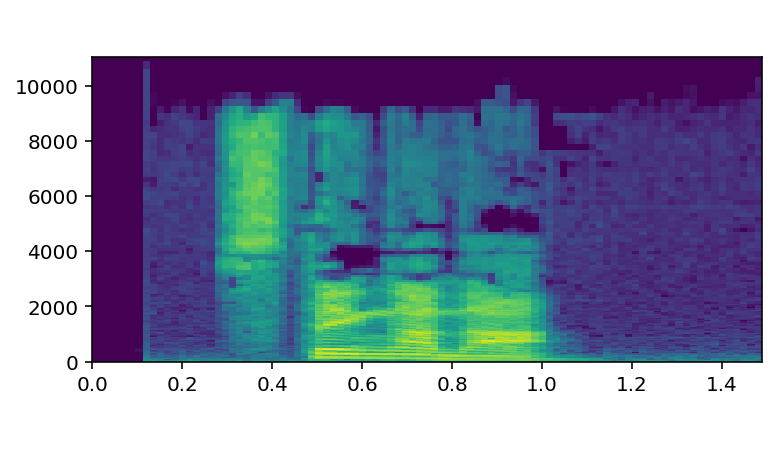

In [151]:
aud2spec(at).show()

In [250]:
item_tfms=[RemoveSilence(), ResizeSignal(2000), aud2spec, MaskTime(1,size=4), MaskFreq(1,size=3)]

<AxesSubplot:>

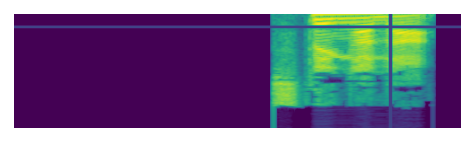

In [251]:
show_image(Pipeline(item_tfms)(at))

<AxesSubplot:>

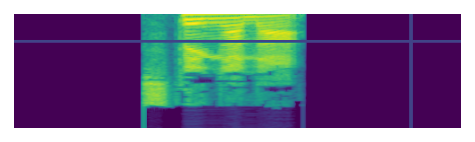

In [252]:
show_image(Pipeline(item_tfms)(at))

In [253]:
dblock = DataBlock(blocks=[AudioBlock, CategoryBlock],
                  get_x=get_x,
                   item_tfms=item_tfms,
                   get_y=get_y,
                   splitter=RandomSplitter(valid_pct=0.2)
                  )

In [254]:
dls3 = dblock.dataloaders(df, )

In [255]:
learn3 = Learner(dls3, xresnet50(True), CrossEntropyLossFlat(),
                 wd=0.05, metrics=[accuracy, F1Score(average='weighted')]).to_fp16()

In [256]:
alter_learner(learn3)

SuggestedLRs(lr_min=0.15848932266235352, lr_steep=0.02290867641568184)

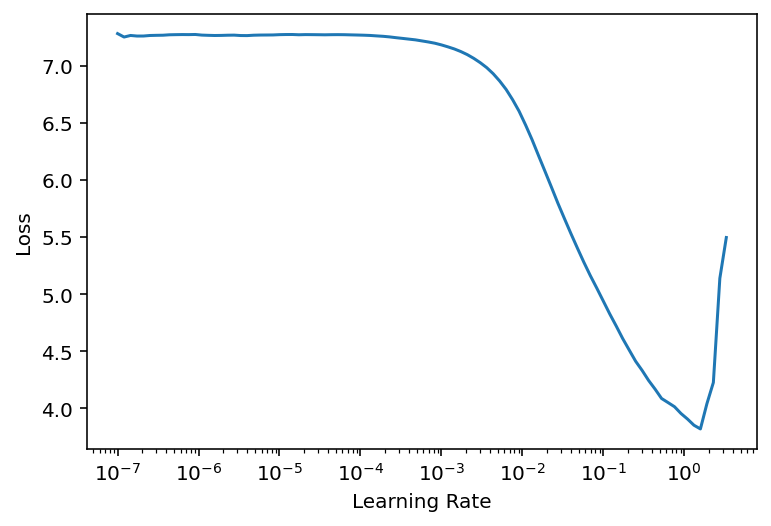

In [257]:
learn3.lr_find()

In [258]:
learn3.fine_tune(10, 7e-3)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,2.023402,0.576362,0.798611,0.795182,00:28


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.506050,0.471721,0.843750,0.843004,00:28
1,0.406081,0.344225,0.886111,0.884617,00:29
2,0.300101,0.246483,0.909722,0.908981,00:29
3,0.220609,0.266529,0.890972,0.890157,00:29
4,0.171470,0.129793,0.959028,0.958892,00:29
5,0.136752,0.148860,0.949306,0.948491,00:29
6,0.112396,0.116091,0.964583,0.964261,00:29
7,0.100745,0.112762,0.961111,0.961050,00:29
8,0.095186,0.103018,0.968750,0.968653,00:29
9,0.091541,0.110760,0.968750,0.968619,00:29


SuggestedLRs(lr_min=9.120108734350651e-06, lr_steep=6.309573450380412e-07)

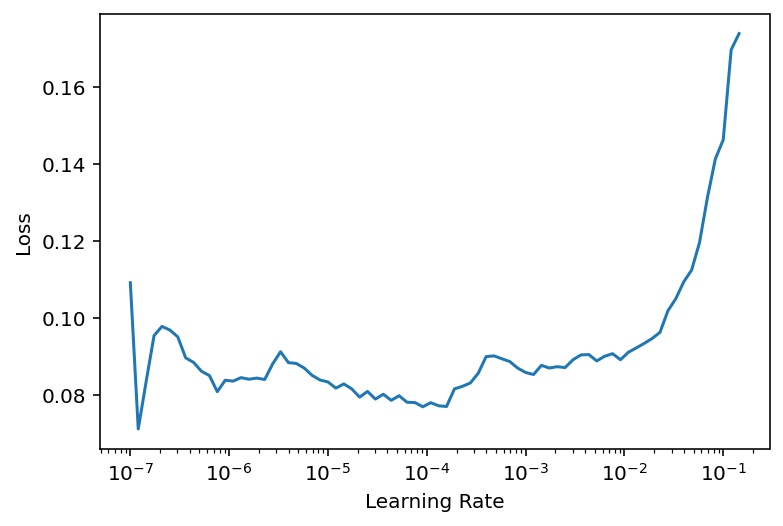

In [259]:
learn3.lr_find()

In [260]:
learn3 = learn3.to_fp32()

In [261]:
learn3.unfreeze()

In [262]:
learn3.fit_one_cycle(3,slice(1e-6, 3e-3))

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.103992,0.119250,0.957639,0.957640,00:27
1,0.099038,0.121427,0.959722,0.959896,00:27
2,0.084354,0.095637,0.969444,0.969233,00:27


## Continuing

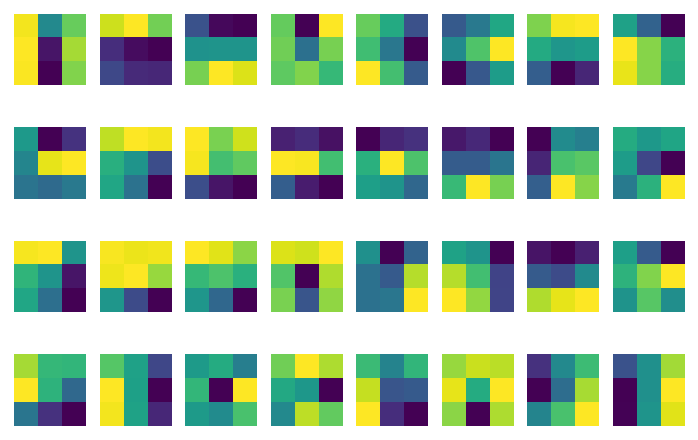

In [53]:
fig, axs = plt.subplots(4,8)
for i, ax in enumerate(axs.flatten()):
    show_image(learn2.model[0][0].weight[i], ax=ax)

In [56]:
learn2.model[0][0]

Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

<AxesSubplot:>

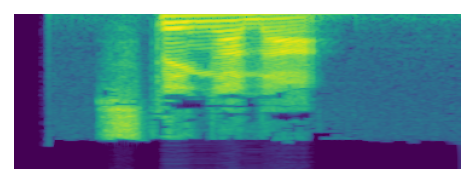

In [59]:
spec = aud2spec(at)
show_image(spec)

In [71]:
res = learn2.model[0][0](spec.unsqueeze(1))

In [68]:
spec.unsqueeze(1).shape

torch.Size([1, 1, 128, 370])

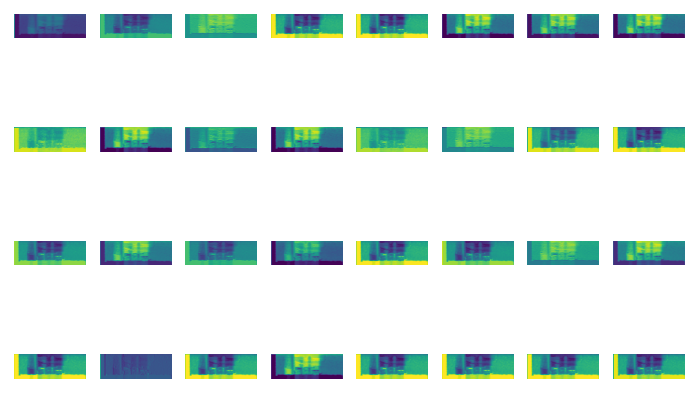

In [75]:
fig, axs = plt.subplots(4,8)
for i, ax in enumerate(axs.flatten()):
    show_image(res[:,i], ax=ax)

In [82]:
res.shape

torch.Size([1, 32, 64, 185])

In [83]:
spec.shape

torch.Size([1, 128, 370])

<AxesSubplot:>

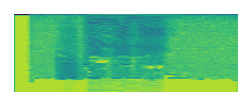

In [86]:
show_image(res[:,12])

In [113]:
interp = ClassificationInterpretation.from_learner(learn2)

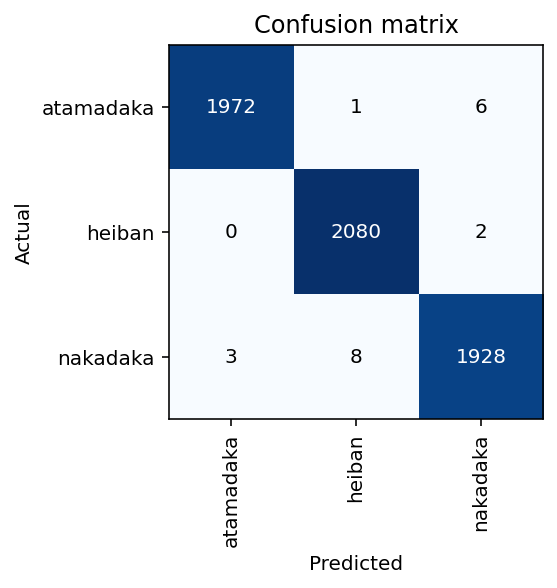

In [153]:
interp.plot_confusion_matrix()

In [117]:
interp.most_confused()

[('nakadaka', 'heiban', 8),
 ('atamadaka', 'nakadaka', 6),
 ('nakadaka', 'atamadaka', 3),
 ('heiban', 'nakadaka', 2),
 ('atamadaka', 'heiban', 1)]

In [119]:
top = interp.top_losses()

In [139]:
top.indices[:1]

TensorBase([1462])

In [143]:
dls2.items.loc[top.indices[:6]]

,0,1
1462,cleanAudio/お召しちりめん.yomi0001738E_00DE.mp3,nakadaka
3944,cleanAudio/沿海漁業.yomi0008265F_0674.mp3,nakadaka
4214,cleanAudio/レシート.yomi0003B60D_05BA.mp3,nakadaka
524,cleanAudio/足首.yomi000A9D85_00B8.mp3,nakadaka
1656,cleanAudio/サスペンダー.yomi00031860_07BC.mp3,nakadaka
1550,cleanAudio/くずようかん.yomi0001A782_0436.mp3,nakadaka


In [150]:
learn2.predict(df.loc[3944])

('nakadaka',
 tensor(2),
 tensor([6.5577e-08, 1.7724e-06, 1.0000e+00, 4.4482e-11, 4.8854e-11, 3.8950e-11,
         4.3451e-11, 5.4500e-11, 3.9563e-11, 4.3113e-11, 3.9563e-11, 4.4831e-11,
         4.4831e-11, 4.7722e-11, 4.3451e-11, 4.8474e-11, 4.7722e-11, 4.4482e-11,
         4.5894e-11, 4.6982e-11, 4.5894e-11, 5.0800e-11, 4.0501e-11, 4.8854e-11,
         4.3792e-11, 3.8950e-11, 4.5894e-11, 4.4136e-11, 5.4076e-11, 4.7722e-11,
         4.4136e-11, 4.3113e-11, 4.6254e-11, 4.4482e-11, 4.0501e-11, 4.1787e-11,
         4.2445e-11, 4.2778e-11, 4.0501e-11, 4.1787e-11, 4.2445e-11, 5.0800e-11,
         4.5537e-11, 4.0186e-11, 4.5894e-11, 3.9563e-11, 3.9873e-11, 4.8854e-11,
         4.9623e-11, 3.7166e-11, 3.8950e-11, 4.1462e-11, 5.0012e-11, 4.3451e-11,
         4.5894e-11, 4.2778e-11, 4.2445e-11, 4.6254e-11, 4.6982e-11, 4.1787e-11,
         4.0819e-11, 4.1139e-11, 4.6982e-11, 3.6590e-11, 4.2778e-11, 3.9873e-11,
         3.9873e-11, 4.0186e-11, 3.8047e-11, 4.1139e-11, 5.0012e-11, 4.9623e-11,
   

In [267]:
df.loc[1462]

0    cleanAudio/お召しちりめん.yomi0001738E_00DE.mp3
1                                    nakadaka
Name: 1462, dtype: object

In [151]:
interp.print_classification_report()

              precision    recall  f1-score   support

   atamadaka       1.00      1.00      1.00      1979
      heiban       1.00      1.00      1.00      2082
    nakadaka       1.00      0.99      1.00      1939

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [152]:
learn2.validate()

(#3) [0.010391141287982464,0.996666669845581,0.9966660108474519]

In [156]:
interp.top_losses(6)

torch.return_types.topk(
values=TensorBase([7.0790, 5.7259, 4.4184, 3.5298, 3.4619, 2.7643]),
indices=TensorBase([1462, 3944, 4214,  524, 1656, 1550]))

In [171]:
dls2.valid.

In [177]:
interp.plot_top_losses??

Signature: interp.plot_top_losses(k, largest=True, **kwargs)
Docstring: <no docstring>
Source:   
    def plot_top_losses(self, k, largest=True, **kwargs):
        losses,idx = self.top_losses(k, largest)
        if not isinstance(self.inputs, tuple): self.inputs = (self.inputs,)
        if isinstance(self.inputs[0], Tensor): inps = tuple(o[idx] for o in self.inputs)
        else: inps = self.dl.create_batch(self.dl.before_batch([tuple(o[i] for o in self.inputs) for i in idx]))
        b = inps + tuple(o[idx] for o in (self.targs if is_listy(self.targs) else (self.targs,)))
        x,y,its = self.dl._pre_show_batch(b, max_n=k)
        b_out = inps + tuple(o[idx] for o in (self.decoded if is_listy(self.decoded) else (self.decoded,)))
        x1,y1,outs = self.dl._pre_show_batch(b_out, max_n=k)
        if its is not None:
            plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), self.preds[idx], losses,  **kwargs)
        #TODO: figure out if this is needed
        #it

<AxesSubplot:>

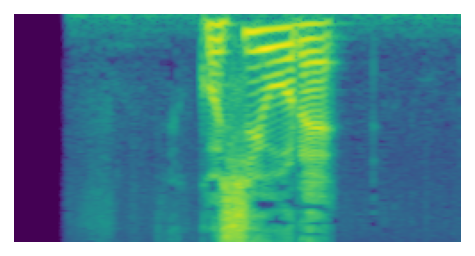

In [194]:
show_image(interp.inputs[0][1462])

In [200]:
interp.targs[1462]

TensorCategory(2)

In [203]:
interp.decoded[1462]

tensor(1)

In [256]:
val2id = dls2.valid.val2idx[0]()

In [261]:
for i in val2id:
    if val2id[i] == 1462:
        item = i
        break

<AxesSubplot:>

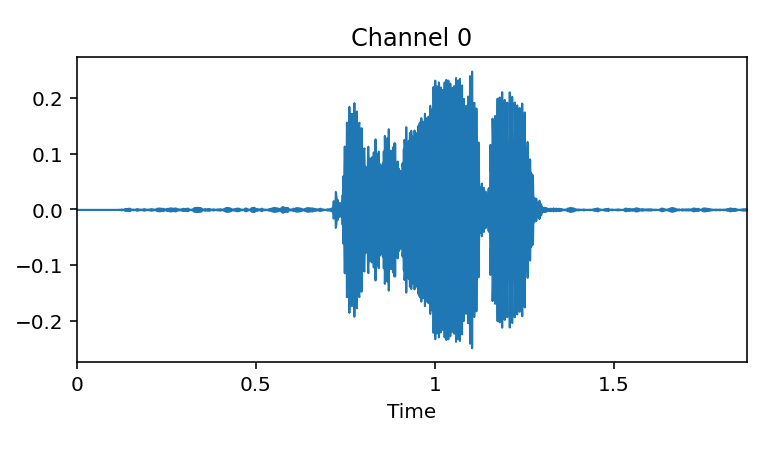

In [263]:
i.show()

<AxesSubplot:>

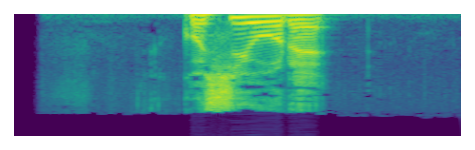

In [265]:
show_image(aud2spec(i))

In [268]:
dls2.vocab

['atamadaka', 'heiban', 'nakadaka']

In [272]:
preds = learn2.tta()

In [279]:
learn2.model[-1]

Linear(in_features=2048, out_features=1000, bias=True)

In [281]:
learn2.predict(Path("cleanAudio/お召しちりめん.yomi0001738E_00DE.mp3"))

('nakadaka',
 tensor(2),
 tensor([1.0761e-04, 1.8738e-04, 9.9968e-01, 2.7894e-08, 3.0161e-08, 2.6721e-08,
         2.9809e-08, 2.9347e-08, 2.7248e-08, 2.9005e-08, 2.7677e-08, 2.8333e-08,
         3.0043e-08, 2.9233e-08, 3.0636e-08, 2.8667e-08, 2.9119e-08, 2.9462e-08,
         3.1362e-08, 3.1608e-08, 2.8003e-08, 2.8223e-08, 3.0397e-08, 2.8780e-08,
         2.9577e-08, 2.6930e-08, 3.2739e-08, 2.8444e-08, 2.8892e-08, 3.0876e-08,
         2.8444e-08, 2.7894e-08, 2.9119e-08, 2.7248e-08, 2.9809e-08, 2.9347e-08,
         3.0043e-08, 2.9809e-08, 2.7785e-08, 2.7248e-08, 2.5299e-08, 3.0397e-08,
         3.0279e-08, 2.8892e-08, 2.8780e-08, 2.6204e-08, 2.5497e-08, 2.7894e-08,
         3.0279e-08, 2.8892e-08, 2.7248e-08, 2.7894e-08, 3.0516e-08, 3.1981e-08,
         3.3515e-08, 3.0756e-08, 2.7248e-08, 2.9005e-08, 2.8333e-08, 2.9693e-08,
         2.8444e-08, 2.8780e-08, 2.9693e-08, 2.8113e-08, 2.7355e-08, 2.8223e-08,
         2.6410e-08, 2.7785e-08, 2.4713e-08, 3.1118e-08, 3.1856e-08, 2.8667e-08,
   

In [14]:
same_kana = data.kana.value_counts()[data.kana.value_counts() > 1].index

In [29]:
data.kana.value_counts()[data.kana.value_counts() > 1]

カン       20
セイシ      15
きコー      15
カンショー    14
きカン      14
         ..
ジンタイ      2
ノゾム       2
ヨーシャ      2
イチ        2
ウカカ゚ウ     2
Name: kana, Length: 6232, dtype: int64

In [20]:
data[data.kana.isin(same_kana[:1])]

,pattern,kana,syl,drop
path,,,,
感.yomi0006E105_00A8.mp3,頭高,カン,2,1
勘.yomi0004F847_0018.mp3,平板,カン,2,0
缶.yomi0009A039_07F4.mp3,頭高,カン,2,1
官.yomi00060828_0434.mp3,頭高,カン,2,1
艦.yomi0009E7AD_043C.mp3,頭高,カン,2,1
漢.yomi0008646B_05AE.mp3,頭高,カン,2,1
棺.yomi0007D125_0206.mp3,頭高,カン,2,1
寒.yomi00062335_0722.mp3,頭高,カン,2,1
款.yomi0007E8ED_011C.mp3,頭高,カン,2,1


In [22]:
data[data.kana==same_kana[2]]

,pattern,kana,syl,drop
path,,,,
機構.yomi0007E434_013C.mp3,平板,きコー,3,0
気候.yomi00080925_01B0.mp3,平板,きコー,3,0
気功.yomi0008095F_018C.mp3,平板,きコー,3,0
貴公.yomi000A8737_0738.mp3,中高,きコー,3,2
寄稿.yomi00062040_0402.mp3,平板,きコー,3,0
寄港.yomi00061FFF_07D6.mp3,平板,きコー,3,0
奇行.yomi0005E429_019E.mp3,平板,きコー,3,0
紀行.yomi00096A37_02A4.mp3,平板,きコー,3,0
気孔.yomi00080A66_01BA.mp3,平板,きコー,3,0


In [34]:
kana_drops = {}
for kana in same_kana:
    drops = set(data[data.kana==kana]['drop'].unique())
    if len(drops) -1:
        kana_drops[kana] = drops

In [32]:
set(data[data.kana=='きコー']['drop'].unique())

{0, 2}

In [43]:
kana_drops
with open('kana_drops.pickle','wb') as file:
    pickle.dump(kana_drops, file)

In [48]:
with open('kana_drops.json','wb') as file:
    json.dumps(kana_drops)

TypeError: Object of type set is not JSON serializable

In [51]:
class SetEncoder(json.JSONEncoder):
    def default(self, obj):
       if isinstance(obj, set):
          return list(obj)
       return json.JSONEncoder.default(self, obj)

In [52]:
json.dumps(kana_drops, cls=SetEncoder)

TypeError: Object of type int64 is not JSON serializable

In [64]:
[print(type(i)) for i in kana_drops['カン']]

<class 'numpy.int64'>
<class 'numpy.int64'>


[None, None]

In [65]:
pd.DataFrame(kana_drops)

ValueError: All arrays must be of the same length

In [72]:
test = pd.DataFrame()
test['lol'] = {1,12}

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [87]:
kana_drops_str = {}
for k,v in kana_drops.items():
    kana_drops_str[k] = ' '.join([str(i) for i in v])

In [94]:
with open('kana_drops.json','wb') as file:
    json.dump(json.dumps(kana_drops_str, ensure_ascii=False), file)

TypeError: a bytes-like object is required, not 'str'

In [86]:
kana_drops_str

{}

In [96]:
with open('kana_drops.json','w') as file:
    json.dump(kana_drops_str,file, ensure_ascii=False)